In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Сид для повтора
np.random.seed(1)

# Предположим, что я выгрузил уже готовые данные при помощи SQL запроса. Для этого создадим значения для последних 21, чтобы можно было высчитать средние значения

# Данные за сегодня + 20 дней для среднего значения
df_daily = pd.DataFrame({
    'day': pd.date_range(end=pd.Timestamp.today(), periods=21),
    'total_applications': np.random.randint(85, 100, size=21),
    'approval_rate': np.random.uniform(0.7, 0.9, size=21),
    'pending_decision': np.random.randint(7, 10, size=21),
    'issued_rate': np.random.uniform(0.6, 0.8, size=21),
    'average_issued_sum': np.random.uniform(5000, 15000, size=21)
})

# Среднее значение за прошлые 20 дней и стандартное отклонение
benchmark_mean = df_daily.iloc[:-1].mean()
benchmark_std = df_daily.iloc[:-1].std()

# Данные за сегодня
today = df_daily.iloc[-1]

# Создаем финальный DataFrame как в SQL запросе
df_comparison = pd.DataFrame({
    'label': ['Today', 'Benchmark'],
    'total_applications': [today['total_applications'], benchmark_mean['total_applications']],
    'approval_rate': [today['approval_rate'], benchmark_mean['approval_rate']],
    'pending_decision': [today['pending_decision'], benchmark_mean['pending_decision']],
    'issued_rate': [today['issued_rate'], benchmark_mean['issued_rate']],
    'average_issued_sum': [today['average_issued_sum'], benchmark_mean['average_issued_sum']]
})

print("Данные по дням:")
display(df_daily.head())
print("Сравнение 'Today' vs 'Benchmark':")
display(df_comparison)
plt.style.use('default')

Для вазуализации данных мы можем использовать линейный график (Time Series) для тренда по дням. 
Так же добавим горизонтальные линий, показывающие среднее значение за 20 дней и 95%-й доверительный интервал (CI).

Это позволит нам отследить динамику изменения показателей по дням и определить, находятся ли текущие показатели в пределах ожидаемых значений.

In [ ]:
plt.figure(figsize=(9,5), dpi = 200)

mean = benchmark_mean['total_applications']
std = benchmark_std['total_applications']
n = len(df_daily.iloc[:-1])

ci = 1.96 * std / np.sqrt(n)

plt.plot(df_daily['day'], df_daily['total_applications'], marker = 'o', label = 'Кол-во заявок')

plt.axhline(y=mean, color='green', linestyle='--', label='Среднее за 20 дней')

# Добавляем линии для 95% доверительного интервала
plt.axhline(y=mean + ci, color='orange', linestyle=':', label='95% CI (верхняя)')
plt.axhline(y=mean - ci, color='orange', linestyle=':', label='95% CI (нижняя)')

# Даты на оси не понравились, переделываю в другой формат
plt.xticks(df_daily['day'], df_daily['day'].dt.strftime('%d %B'), rotation=90)

plt.title('Кол-во заявок в день')
plt.xlabel('Дата')
plt.ylabel('Кол-во заявок')

# Описание покрывало часть графика, вынес его за пределы
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.tight_layout()
plt.show()

Так же данные можно визуализировать как столбчатые диаграммы. Они проще, поэтому можем построить диаграмму для каждого показателя. Быстрое сравнение, но без особых диталей.

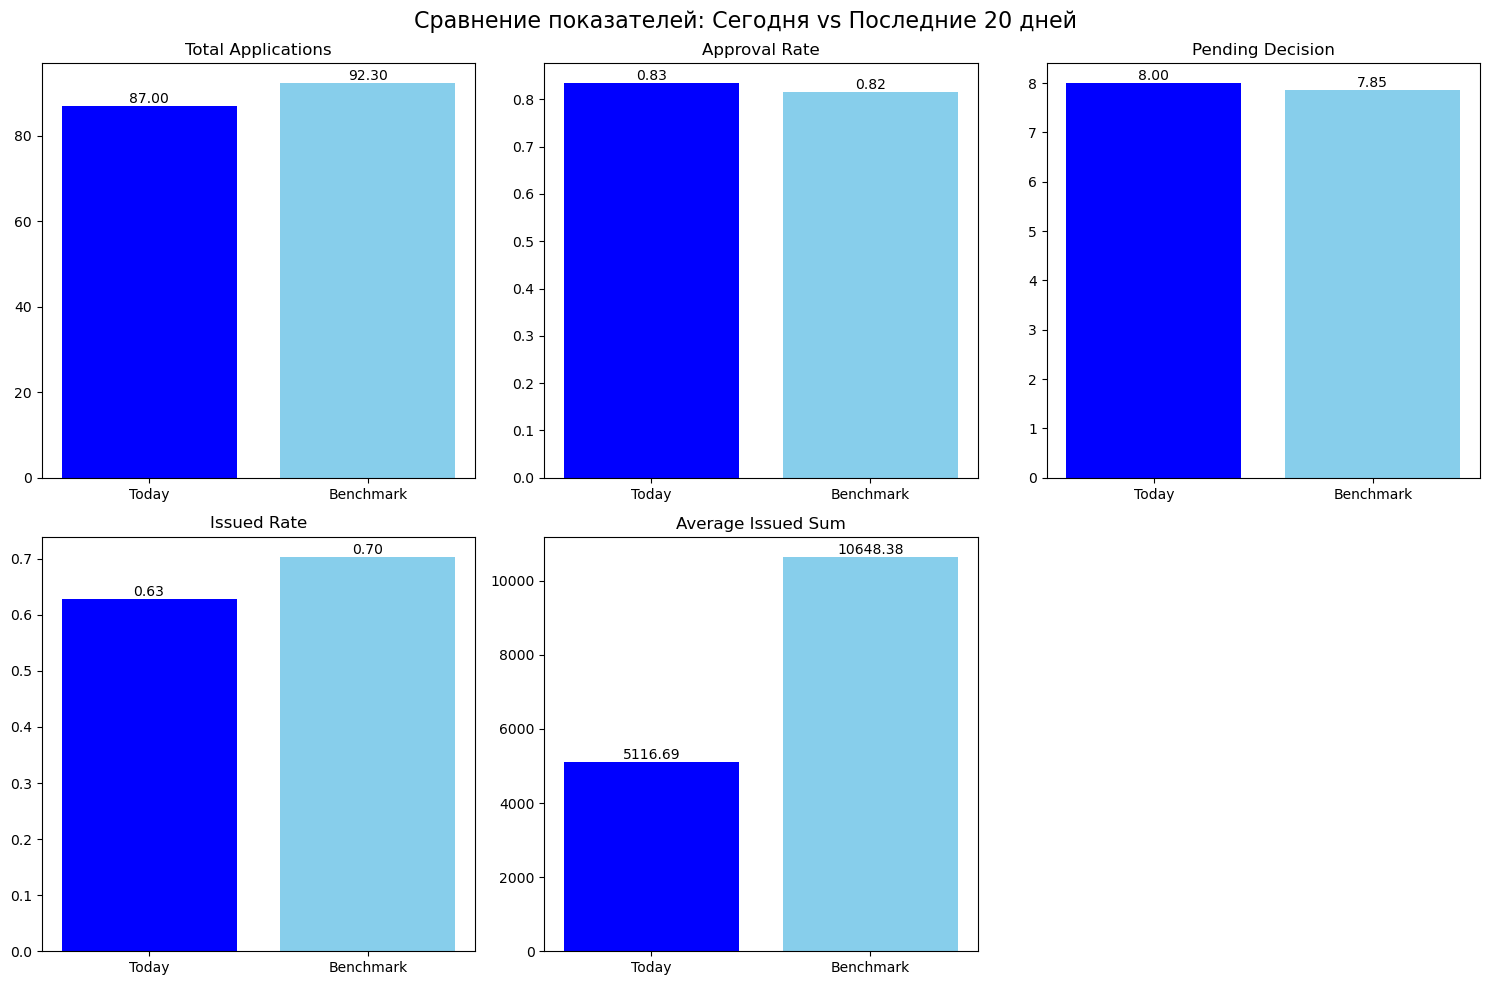

In [12]:
metrics = ['total_applications', 'approval_rate', 'pending_decision', 'issued_rate', 'average_issued_sum']

# Так как столбчатые диаграммы просты в прочтении, мы можем показать их вместе
fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=100)
axes = axes.flatten()  # для удобства перебора по одномерному массиву осей

# Строим диаграмму для каждого значения (metrics)
for i, metric in enumerate(metrics):
    today_val = df_comparison.loc[df_comparison['label'] == 'Today', metric].values[0]
    bench_val = df_comparison.loc[df_comparison['label'] == 'Benchmark', metric].values[0]
    
    axes[i].bar(['Today', 'Benchmark'], [today_val, bench_val], color=['blue', 'skyblue'])
    axes[i].set_title(metric.replace('_', ' ').title())
    
    for j, v in enumerate([today_val, bench_val]):
        axes[i].text(j, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
        
# Скрываем последнюю пустую диаграмму, значений только 5
axes[5].axis('off')

plt.suptitle("Сравнение показателей: Сегодня vs Последние 20 дней", fontsize=16)
plt.tight_layout()
plt.show()

Так же мы можем использовать боксплоты. Они дадут нам хороший баланс между информативностью линейных графиков и простотой столбчатых диаграмм. Так мы можем увидеть как текущий показатель показывает себя относительно прошлых дней.

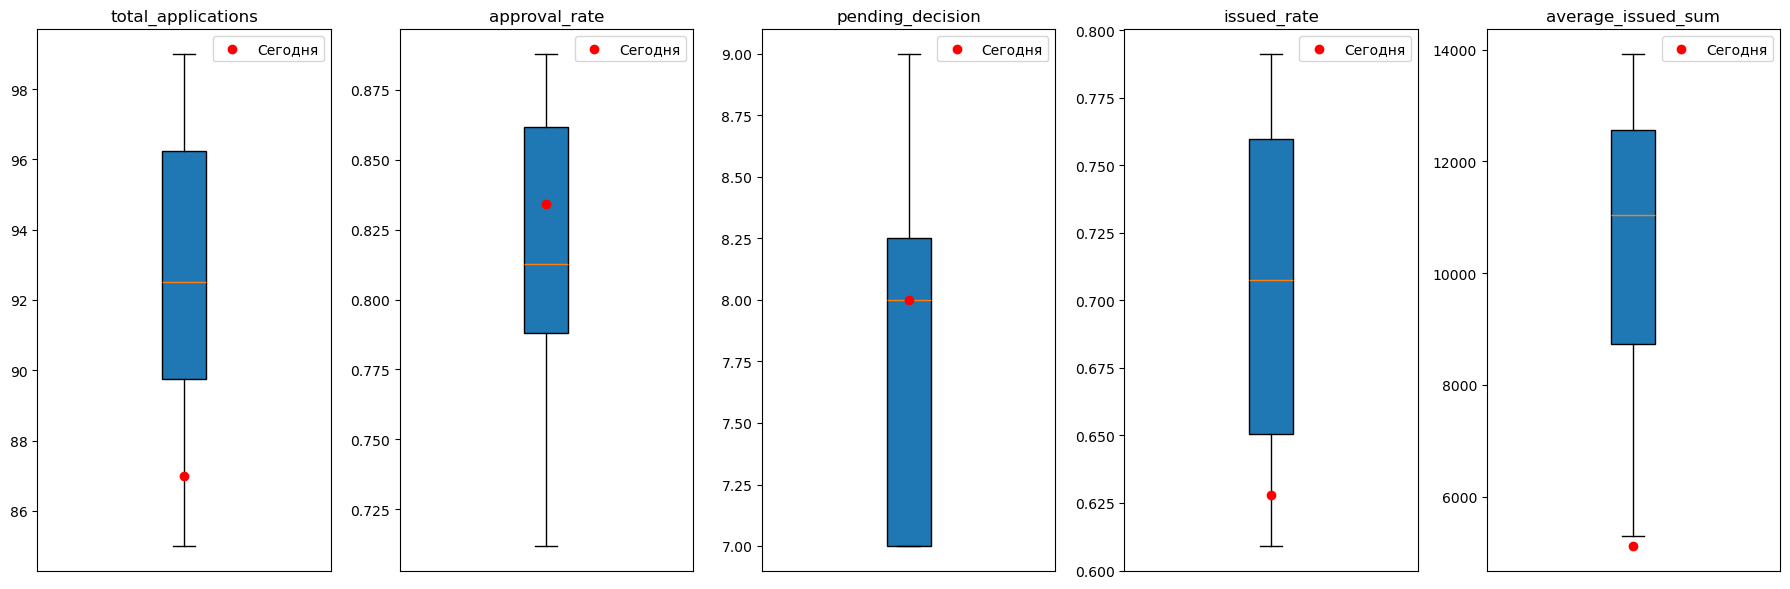

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(18, 6))
for i, metric in enumerate(metrics):
    # Боксплот по предыдущим 20 дням для понимания 
    axes[i].boxplot(df_daily.iloc[:-1][metric], vert=True, patch_artist=True)
    # Наносим точку "сегодня"
    axes[i].scatter(1, today[metric], color='red', zorder=3, label='Сегодня')
    axes[i].set_title(metrics[i])
    axes[i].set_xticks([]) 
    axes[i].legend()

plt.tight_layout()
plt.show()